<a href="https://colab.research.google.com/github/adilsaid64/Data-Science-and-Machine-Learning-Portfolio/blob/main/Titanic%20Logistic%20Regression%20Predicting%20Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Logistic Regression Project
Aim: To predict survival, and learn how to use Logistic Regression in Python.

Challenge.  link: https://www.kaggle.com/competitions/titanic/overview



## Loading the data

1. Loading the data
2. Getting a general overview of the data

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [ ]:
#combining the test and train datasets
df = pd.concat([test_df.assign(ind="test"), train_df.assign(ind="train")])

In [ ]:
df = df.reset_index()

In [ ]:
df

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind,Survived
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test,NaN
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test,NaN
2,2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,test,NaN
3,3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,test,NaN
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,test,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,train,0.0
1305,887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,train,1.0
1306,888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,train,0.0
1307,889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,train,1.0


In [ ]:
#Checking for null values
df.isnull().sum()/len(df)

index          0.000000
PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
ind            0.000000
Survived       0.319328
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  ind          1309 non-null   object 
 13  Survived     891 non-null    float64
dtypes: float64(3), int64(5), object(6)
memory usage: 143.3+ KB


In [ ]:

df.describe()

,index,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,891.000000
mean,369.478992,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.383838
std,248.767105,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.486592
min,0.000000,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,327.000000,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,563.000000,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,890.000000,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [ ]:
df = df.drop("index", axis = 1)

- 20% of the Age column, 77% of the Cabin column, and 0.15% of the Embarked column contain missing values
- Total of 12 features. 
- 7 Numerical and 5 Objects (Excluding the ind)

##Exploratory Data Analysis (EDA)
1. EDA
3. Correlation

###Pclass
1. Which is the most common passanger class?
2. A relationship between Class and Survival?

In [ ]:
df["Pclass"].value_counts()/len(df["Pclass"])

3    0.541635
1    0.246753
2    0.211612
Name: Pclass, dtype: float64

54% of people are class 3, 21% of people class 2, and 25% of people class 1

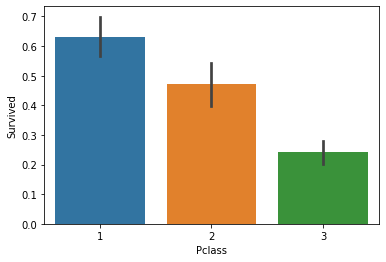

In [ ]:
sns.barplot(data = df, x = "Pclass", y = "Survived")

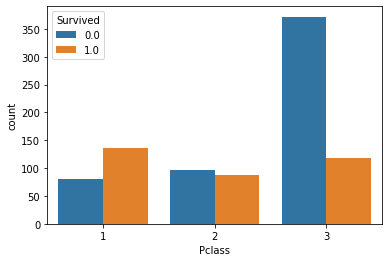

In [ ]:
sns.countplot(data = df, x = "Pclass", hue = "Survived")

It seems the lower the class, the lower the chance of survival. More people in class 1 survived than any other class, and is the only class where you are more likely to survive than not survive.

Survival rates are the worst in class 3. 

Questions: 
What types of people where more likely to survive from each class?

###Name
1. Types of titles/people that where on the ship
2. Title with class, and Survival

In [ ]:
df["Name"]

0                                   Kelly, Mr. James
1                   Wilkes, Mrs. James (Ellen Needs)
2                          Myles, Mr. Thomas Francis
3                                   Wirz, Mr. Albert
4       Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                            ...                     
1304                           Montvila, Rev. Juozas
1305                    Graham, Miss. Margaret Edith
1306        Johnston, Miss. Catherine Helen "Carrie"
1307                           Behr, Mr. Karl Howell
1308                             Dooley, Mr. Patrick
Name: Name, Length: 1309, dtype: object

Each persons title is given after the first comma. So after the first name. I will try to extract this information.

In [ ]:
df[["First Name", "Last Name"]] = df["Name"].str.split(",", expand = True)

In [ ]:
df[["Title", "Last Name", "Other Names"]] = df["Last Name"].str.split(".", expand = True)

In [ ]:
df = df.drop(["First Name", "Last Name", "Other Names"], axis = 1)

In [ ]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test,NaN,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test,NaN,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,test,NaN,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,test,NaN,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,test,NaN,Mrs


In [ ]:
df["Title"].value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Ms                2
 Major             2
 Mlle              2
 Sir               1
 the Countess      1
 Capt              1
 Don               1
 Lady              1
 Mme               1
 Dona              1
 Jonkheer          1
Name: Title, dtype: int64

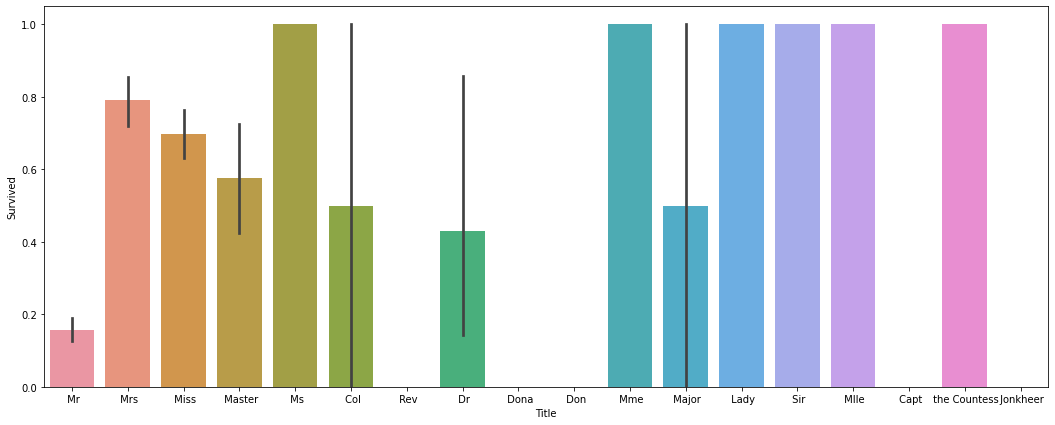

In [ ]:
plt.figure(figsize=(18,7))

sns.barplot(data = df, x= "Title", y = "Survived")

1. We see the captain did not survive.
2. Higher titles like Lady, Sir, survived.
3. Seems Mr titles, have low survival rate, compared with Mrs and Miss.

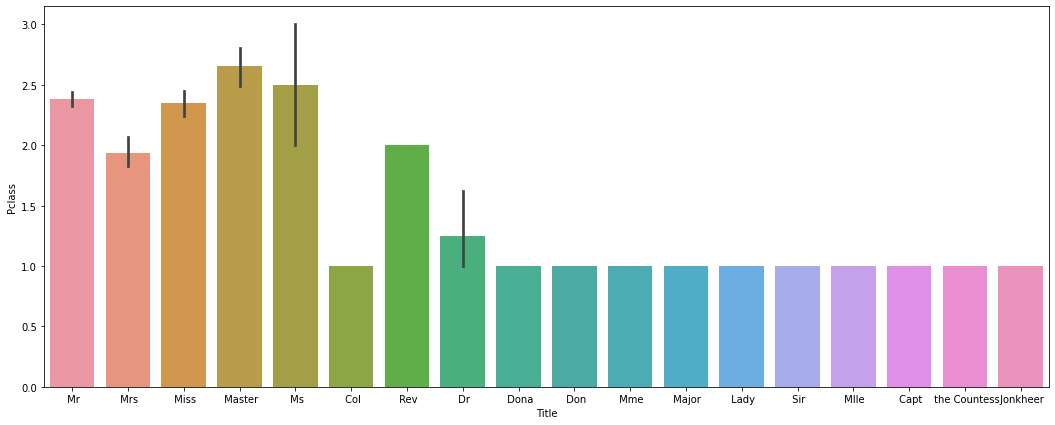

In [ ]:
plt.figure(figsize=(18,7))

sns.barplot(data = df, x= "Title", y = "Pclass")

It seems the higher the title, the higher the class.

###Sex
1. Which gender survived more?
2. Are men and women distrubuted equally in all classes?

In [ ]:
df["Sex"].value_counts()/len(df["Sex"])

male      0.644003
female    0.355997
Name: Sex, dtype: float64

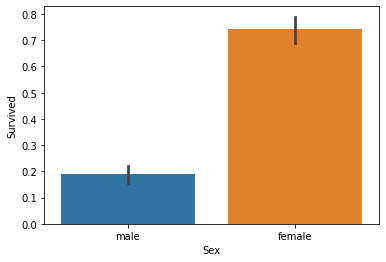

In [ ]:
sns.barplot(data = df, x = "Sex", y = "Survived")

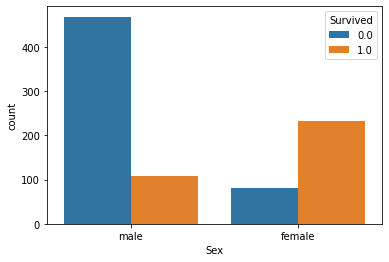

In [ ]:
sns.countplot(data = df, x = "Sex", hue = "Survived")

In [ ]:
df.groupby(["Sex"]).mean().round(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
Sex,,,,,,,
female,648.187,2.155,28.687,0.652,0.633,46.198,0.742
male,658.766,2.372,30.585,0.414,0.248,26.155,0.189


There was signifcantly more men than women on the ship. Women were much more likely to survive than men.

74.2% of women survived compared with 18.9% of men.

We also see here that the mean age, and class are simular. However we notive that males payed significantly lower fare than females.

Across all the classes, females are more likely to survive

###Age
1. Distribution of Age of the titanic
2. Age with Survival and Class

In [ ]:
df["Age"].describe().round()

count    1046.0
mean       30.0
std        14.0
min         0.0
25%        21.0
50%        28.0
75%        39.0
max        80.0
Name: Age, dtype: float64

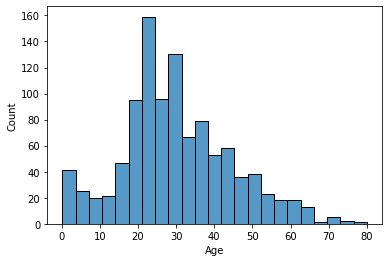

In [ ]:
sns.histplot(x= df["Age"])

1. Seems that majority of people are between 20 and 40.
2. Mean age is about 30, youngest on board was 0 years old, and the oldest was 80 years old.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


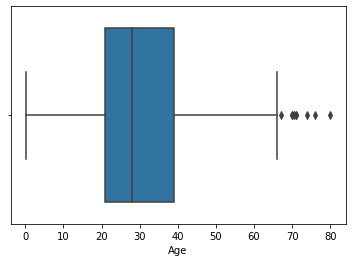

In [ ]:
sns.boxplot(df["Age"])

There are outliers, however they seem reasonable and not extreme

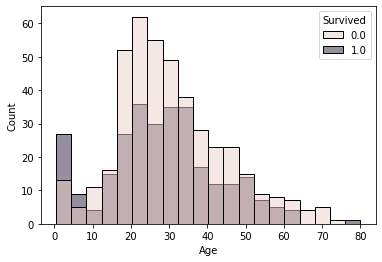

In [ ]:
#group ages together, and look at survival and deaths
sns.histplot(data = df, x = "Age", hue = "Survived")

In [ ]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test,NaN,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test,NaN,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,test,NaN,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,test,NaN,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,test,NaN,Mrs


###SibSp
number of siblings or spouse of a person onboard



In [ ]:
df["SibSp"].describe()

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: SibSp, dtype: float64

The maximum is 8, the minimum is 0

In [ ]:
(df["SibSp"].value_counts()/len(df["SibSp"])).round(3)

0    0.681
1    0.244
2    0.032
4    0.017
3    0.015
8    0.007
5    0.005
Name: SibSp, dtype: float64

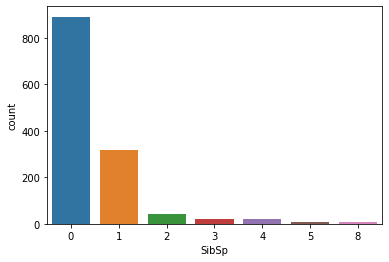

In [ ]:
sns.countplot(data = df, x = "SibSp")

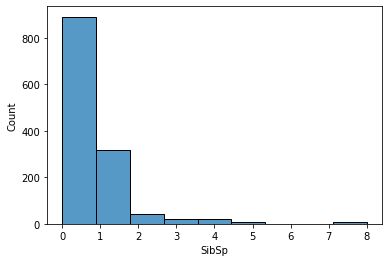

In [ ]:
sns.histplot(df["SibSp"], bins = 9)

68% of people came single, without spouse or sibling. 24.4% came with 1 sibling or spouse.

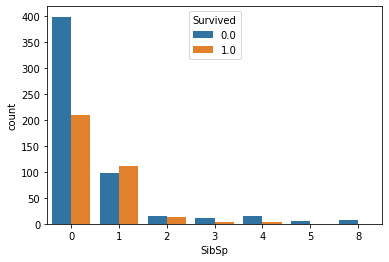

In [ ]:
sns.countplot(data = df, x = "SibSp", hue = "Survived")

In [ ]:
df.groupby(["SibSp"]).mean().round(3)

,PassengerId,Pclass,Age,Parch,Fare,Survived
SibSp,,,,,,
0,660.464,2.351,30.922,0.182,25.785,0.345
1,668.075,2.034,31.058,0.718,48.711,0.536
2,629.833,2.333,23.569,0.571,48.941,0.464
3,484.700,2.550,16.312,1.250,71.332,0.250
4,510.864,3.000,8.773,1.545,30.594,0.167
5,452.667,3.000,10.167,2.000,46.900,0.000
8,633.778,3.000,14.500,2.000,69.550,0.000


It seems like, chances of survival are best when you traveled with 1 person.
Chances of survival drop if someone traveled with 2 or more siblings or spouse.


###Parch
Number of parents or children each passenger came with

In [ ]:
df["Parch"].describe()

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: Parch, dtype: float64

Minimum of 0 and maxumum of 9

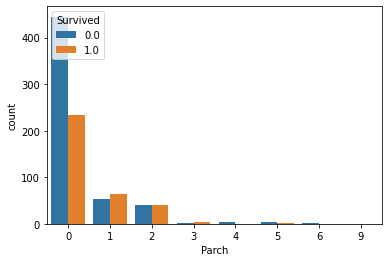

In [ ]:
sns.countplot(data = df, x = "Parch", hue = "Survived")

In [ ]:
df.groupby(["Parch"]).mean().round(3)

,PassengerId,Pclass,Age,SibSp,Fare,Survived
Parch,,,,,,
0,655.903,2.311,31.969,0.244,26.330,0.344
1,666.906,2.159,24.966,1.029,50.078,0.551
2,618.814,2.301,18.976,1.903,61.346,0.500
3,739.500,2.125,38.875,0.875,86.689,0.600
4,586.833,2.333,47.600,0.667,104.724,0.000
5,540.333,3.000,39.333,0.667,32.356,0.200
6,855.000,3.000,41.500,1.000,46.900,0.000
9,1245.500,3.000,NaN,1.000,69.550,NaN


It follows a very simular pattern to SibSp

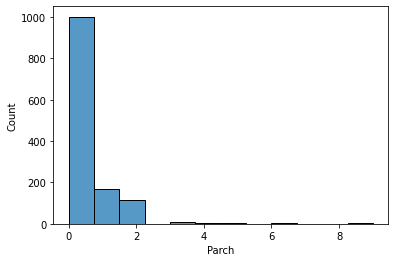

In [ ]:
sns.histplot(df["Parch"])

In [ ]:
#creating a combined column for Parch and SibSp
df["Family"] = df["SibSp"]+df["Parch"]

In [ ]:
df.groupby(["Family"]).mean().round(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
Family,,,,,,,
0,663.743,2.395,31.512,0.000,0.000,21.760,0.304
1,626.149,1.894,32.727,0.779,0.221,51.228,0.553
2,687.635,2.226,26.534,0.893,1.107,41.566,0.578
3,708.140,2.116,19.423,1.302,1.698,51.186,0.724
4,594.273,2.500,23.765,2.000,2.000,80.067,0.200
5,466.240,2.480,20.120,2.800,2.200,87.081,0.136
6,547.375,3.000,17.375,3.250,2.750,28.396,0.333
7,553.250,3.000,18.000,4.000,3.000,46.900,0.000
10,745.000,3.000,14.500,6.727,3.273,69.550,0.000


In [ ]:
df["Family"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: Family, dtype: int64

In [ ]:
df["Family"].describe()

count    1309.000000
mean        0.883881
std         1.583639
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: Family, dtype: float64

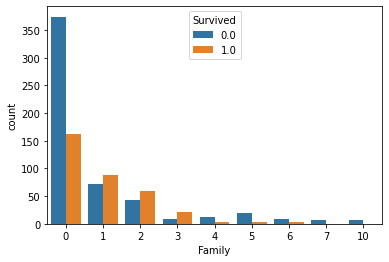

In [ ]:
sns.countplot(data = df, x = "Family", hue = "Survived")

It seems that family travelling with a family of size 1,2, and 3 increases survival rates.However family sizees larger than 4, and traveling alone have lower survival rates.

In [ ]:
df["Alone"] = df["Family"]==0

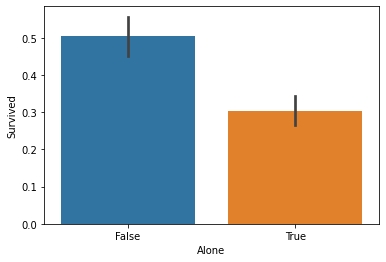

In [ ]:
sns.barplot(x = df["Alone"], y = df["Survived"])

It seems that people have a higher chance of surviving when they are not alone.

###Fare

In [ ]:
df["Fare"].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

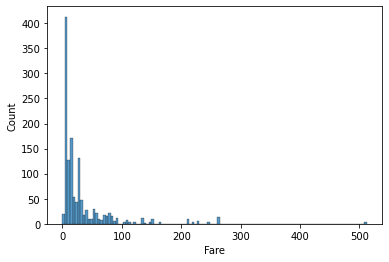

In [ ]:
sns.histplot(df["Fare"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


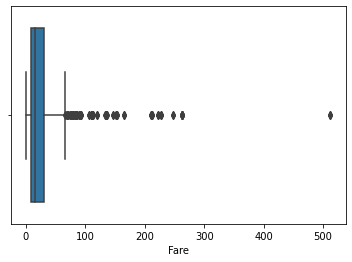

In [ ]:
sns.boxplot(df["Fare"])

Average fair paid is 33.3 units. The minimum is 0 and maximum is 512.3 units. 
Looking at the boxplot it looks like an outlier.

In [ ]:
df[df["Fare"]>500]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind,Survived,Title,Family,Alone
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,test,NaN,Mrs,1,False
676,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,train,1.0,Miss,0,True
1097,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,train,1.0,Mr,1,False
1155,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,train,1.0,Mr,0,True


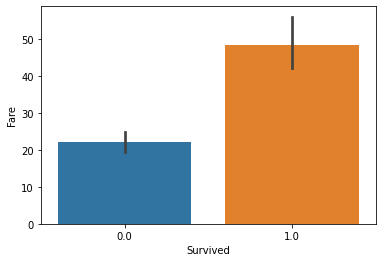

In [ ]:
sns.barplot(data = df, x = "Survived", y = "Fare")

people that survived paid a higher ticket fair on average to those that did not.

###Embarked
Embarked from Southampton, Cherbourg, or Queenstown

In [ ]:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

Most of the people came from location S

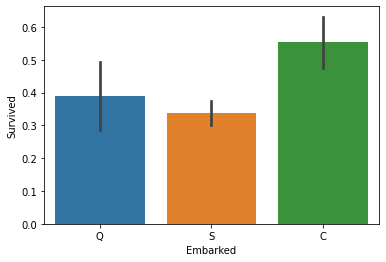

In [ ]:
sns.barplot(data= df, x = "Embarked", y = "Survived")

It seems those that embarked from location C survived more on average than any other location. Those from location S survived on average less.

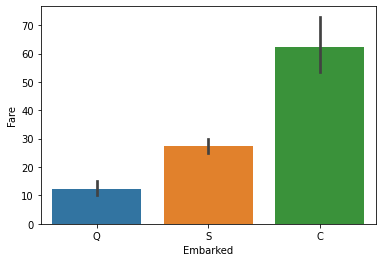

In [ ]:
sns.barplot(data= df, x = "Embarked", y = "Fare")

Those that came from location C also paid a higher fare on average

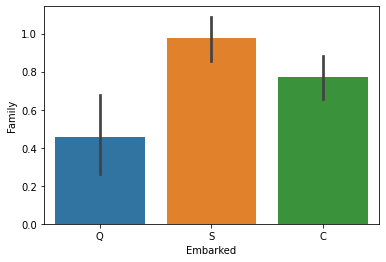

In [ ]:
sns.barplot(data= df, x = "Embarked", y = "Family")

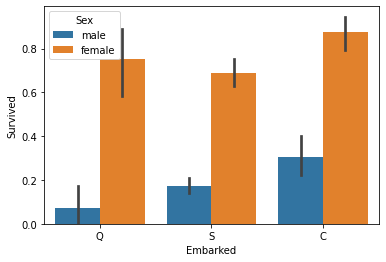

In [ ]:
sns.barplot(data = df, x = "Embarked", y = "Survived", hue = "Sex")

It seems that the survival rates of females are higher on average than men across all locations.

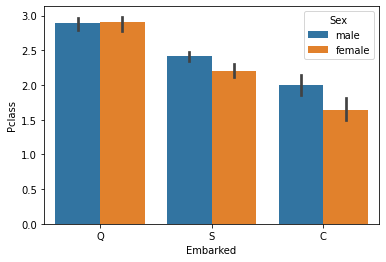

In [ ]:
sns.barplot(data = df, x = "Embarked", y = "Pclass", hue = "Sex")

It seems those that embarked from Q, on average had lower class tickets, compared with S and C. Those that embarked from C on average had higher class tickets.

##Data Preprocessing
- Fixing missing values
- Encoding categorical variables

###Missing values

In [ ]:
df.isnull().sum()/len(df)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
ind            0.000000
Survived       0.319328
Title          0.000000
Family         0.000000
Alone          0.000000
dtype: float64

In [ ]:
#since 77% of cabin is missing, ill drop this
df = df.drop("Cabin", axis = 1)

In [ ]:
#Embarked, fill with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [ ]:
#Age, fill with the mean
df["Age"].fillna(df["Age"].mean().round(0), inplace=True)

In [ ]:
#Dropping columns that I wont use
df = df.drop(["Name"], axis = 1)

In [ ]:
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ind,Survived,Title,Family,Alone
0,892,3,male,34.5,0,0,330911,7.8292,Q,test,NaN,Mr,0,True
1,893,3,female,47.0,1,0,363272,7.0000,S,test,NaN,Mrs,1,False
2,894,2,male,62.0,0,0,240276,9.6875,Q,test,NaN,Mr,0,True
3,895,3,male,27.0,0,0,315154,8.6625,S,test,NaN,Mr,0,True
4,896,3,female,22.0,1,1,3101298,12.2875,S,test,NaN,Mrs,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,887,2,male,27.0,0,0,211536,13.0000,S,train,0.0,Rev,0,True
1305,888,1,female,19.0,0,0,112053,30.0000,S,train,1.0,Miss,0,True
1306,889,3,female,30.0,1,2,W./C. 6607,23.4500,S,train,0.0,Miss,3,False
1307,890,1,male,26.0,0,0,111369,30.0000,C,train,1.0,Mr,0,True


###Encoding catogorical variables
For Sex, Embarked, Title, Alone




In [ ]:
df=pd.get_dummies(df,columns=["Embarked","Title"],drop_first=True)

In [ ]:
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,ind,Survived,...,Title_ Master,Title_ Miss,Title_ Mlle,Title_ Mme,Title_ Mr,Title_ Mrs,Title_ Ms,Title_ Rev,Title_ Sir,Title_ the Countess
0,892,3,male,34.5,0,0,330911,7.8292,test,NaN,...,0,0,0,0,1,0,0,0,0,0
1,893,3,female,47.0,1,0,363272,7.0000,test,NaN,...,0,0,0,0,0,1,0,0,0,0
2,894,2,male,62.0,0,0,240276,9.6875,test,NaN,...,0,0,0,0,1,0,0,0,0,0
3,895,3,male,27.0,0,0,315154,8.6625,test,NaN,...,0,0,0,0,1,0,0,0,0,0
4,896,3,female,22.0,1,1,3101298,12.2875,test,NaN,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,887,2,male,27.0,0,0,211536,13.0000,train,0.0,...,0,0,0,0,0,0,0,1,0,0
1305,888,1,female,19.0,0,0,112053,30.0000,train,1.0,...,0,1,0,0,0,0,0,0,0,0
1306,889,3,female,30.0,1,2,W./C. 6607,23.4500,train,0.0,...,0,1,0,0,0,0,0,0,0,0
1307,890,1,male,26.0,0,0,111369,30.0000,train,1.0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#Sex and Alone
df["Sex"].replace(["male", "female"],
                        [0,1], inplace=True)

In [ ]:
df["Alone"].replace([True, False],
                        [1,0], inplace=True)

In [ ]:
df.columns = df.columns.str.replace(' ', '')

In [ ]:
#Test and training data
test, train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]

In [ ]:
test = test.drop("ind", axis = 1)
train = train.drop("ind", axis = 1)

###Splitting the Data

In [ ]:
X = train.drop("Survived", axis = 1).copy()
y = train["Survived"].copy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

##Correlations

In [ ]:
df = df.drop("ind", axis = 1)

In [ ]:
df.corr()["Survived"].sort_values(ascending = False).round(3)

Survived             1.000
Sex                  0.543
Title_Mrs            0.339
Title_Miss           0.327
Fare                 0.257
Title_Master         0.085
Parch                0.082
Title_Mlle           0.060
Title_Lady           0.042
Title_Mme            0.042
Title_theCountess    0.042
Title_Sir            0.042
Title_Ms             0.042
Family               0.017
Title_Major          0.011
Title_Col            0.011
Title_Dr             0.008
Embarked_Q           0.004
PassengerId         -0.005
Title_Don           -0.026
Title_Jonkheer      -0.026
SibSp               -0.035
Title_Rev           -0.065
Age                 -0.071
Embarked_S          -0.150
Alone               -0.203
Pclass              -0.338
Title_Mr            -0.549
Title_Dona             NaN
Name: Survived, dtype: float64

1. Sex   :                 0.543
2. Title_ Mrs:             0.339
3. Title_ Miss:            0.327
4.  Fare      :             0.257
5. Embarked_S       :     -0.150
6. Alone  :               -0.203
7. Pclass    :            -0.338
8. Title_ Mr  :           -0.549

Text(0.5, 1.0, 'Correlation Matrix')

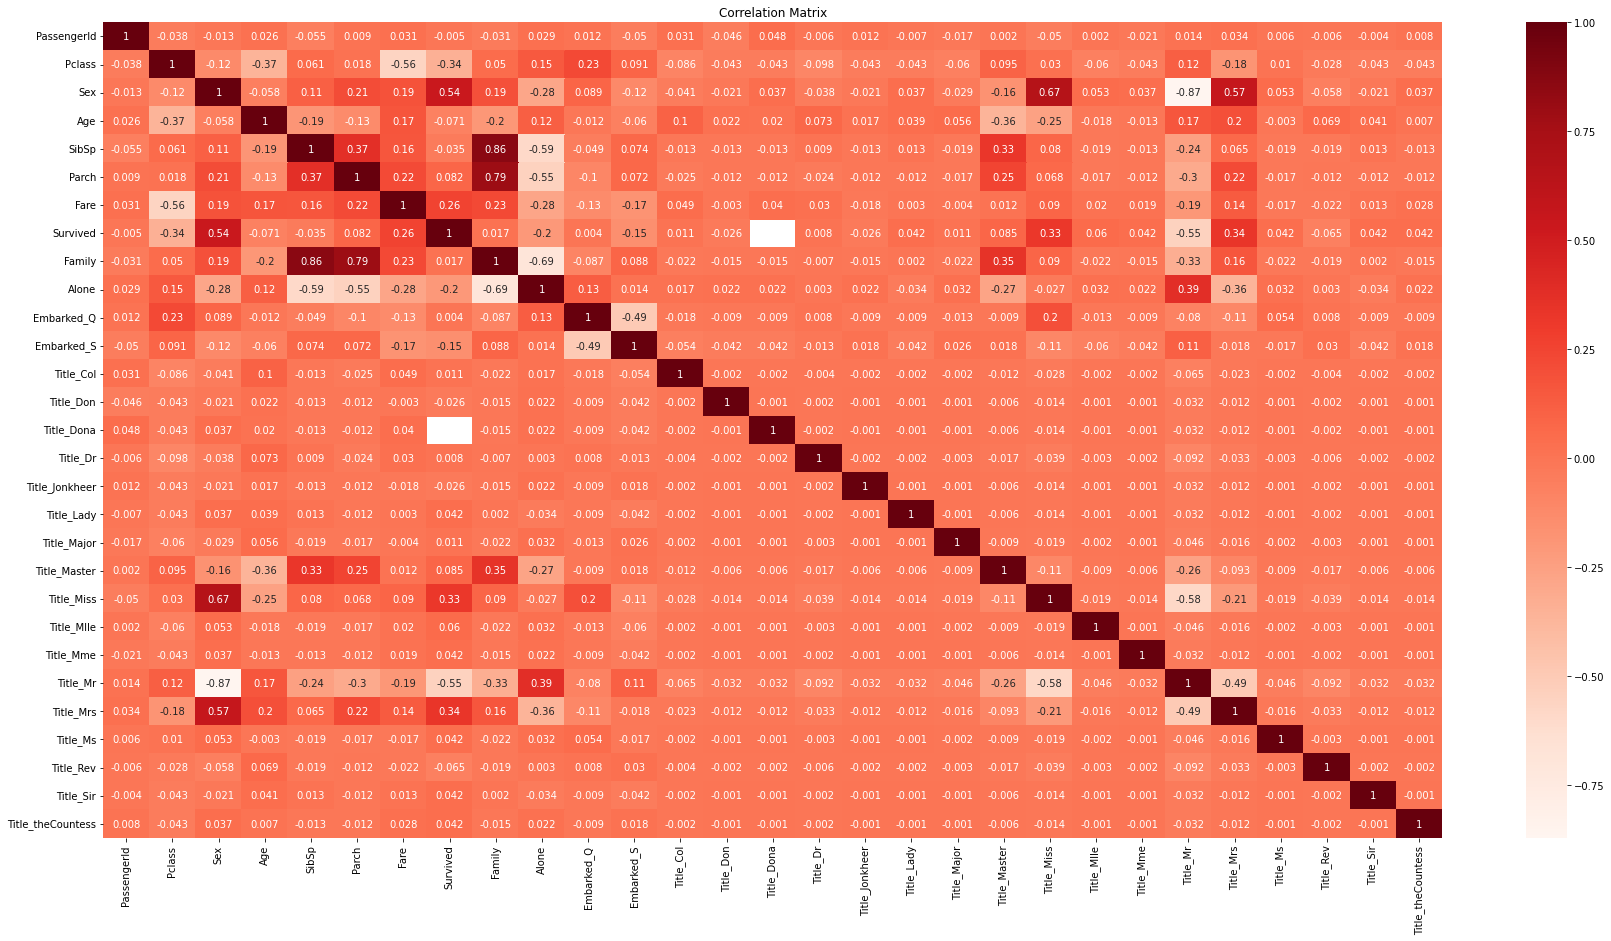

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr().round(3), cmap = "Reds", annot = True)
plt.title("Correlation Matrix")

Fare is highly correlated with Pclass, all the Titles are highly correlated with Sex. Alone, Family, SibSp, and Parch are highly correlated with each other, so I won't use all of them.

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression()

In [ ]:
cols = ["Sex", "Age", "Pclass", "Family"]

logisticRegr.fit(X_train[cols], y_train)

y_pred = logisticRegr.predict(X_test[cols])

In [ ]:
#Evaluation using confusion matrics
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[90, 18],
       [27, 44]])

Text(0.5, 15.0, 'Predicted label')

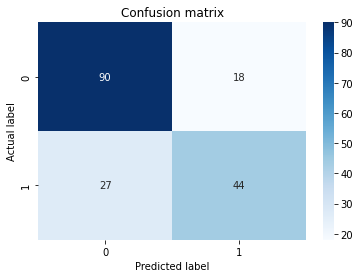

In [ ]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues")

plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [ ]:
logisticRegr.score(X_test[cols], y_test).round(3)

0.749

Looking at the confusion matrix, the diagonal values represent accurate predictions, whereas non-diagonals represent inaccurate predictions. We see that 90, and 44 are correct predictions, and 27 and 18 are incorrect predictions.
We have an accuracy score of 74.9%

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Didn't Survive", 'Survived']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Didn't Survive       0.77      0.83      0.80       108
      Survived       0.71      0.62      0.66        71

      accuracy                           0.75       179
     macro avg       0.74      0.73      0.73       179
  weighted avg       0.75      0.75      0.75       179



Precision: When the model predicted if people were going to survive, it was correct 77% of the time.

Recall: If their people who have survived in the test set, and the logistic model identifies it 62% of the time.

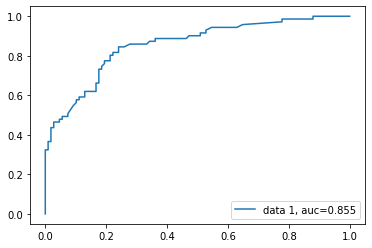

In [ ]:
#Receiver Operating Characteristic (ROC) curve
y_pred_proba = logisticRegr.predict_proba(X_test[cols])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc.round(3)))
plt.legend(loc=4)
plt.show()

The Receiver Operating Characteristic is a plot of the true positive rate and false positive rate. It shows the trade between sensitivity and specificity.

AOC of 1 represents a perfect classifier, and 0.5 is a worthless one. This model gets a score of 0.855.

Learned how to evaluate a logistic regression here:

https://www.datacamp.com/tutorial/understanding-logistic-regression-python

In [ ]:
#using the model for the test set
prediction = logisticRegr.predict(test[cols])

In [ ]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Survived,Family,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_theCountess
0,892,3,0,34.5,0,0,330911,7.8292,NaN,0,...,0,0,0,0,1,0,0,0,0,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,1,...,0,0,0,0,0,1,0,0,0,0
2,894,2,0,62.0,0,0,240276,9.6875,NaN,0,...,0,0,0,0,1,0,0,0,0,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,0,...,0,0,0,0,1,0,0,0,0,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,2,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,30.0,0,0,A.5. 3236,8.0500,NaN,0,...,0,0,0,0,1,0,0,0,0,0
414,1306,1,1,39.0,0,0,PC 17758,108.9000,NaN,0,...,0,0,0,0,0,0,0,0,0,0
415,1307,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,...,0,0,0,0,1,0,0,0,0,0
416,1308,3,0,30.0,0,0,359309,8.0500,NaN,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
output = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": prediction})

In [ ]:
output

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


##Summary
- Did some EDA
- Fitted a logistic model to predict survival rate
- Evaluated the model
---
Could improve:
- Could have done a more indepth EDA on columns to get a deeper understanding.
- More feature engineering.
- Create multiple models and compare performance between them.